In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams['figure.figsize']=[12,8]
matplotlib.rc('font',family='NanumGothic')

df_do=pd.read_excel("./탕용기.xlsx",encoding="UTF-8")


/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
df_do=df_do[['주문일시','수량']]

In [3]:
df_do['주문일시']=df_do['주문일시'].astype(str)
type(df_do['주문일시'][0])

str

In [4]:
df_do['주문일시']=df_do['주문일시'].str.slice(start=0,stop=7)
df_do

,주문일시,수량
0,2017-06,1
1,2017-06,1
2,2017-06,1
3,2017-07,1
4,2017-08,1
...,...,...
4644,2019-05,1
4645,2019-05,1
4646,2019-05,1
4647,2019-05,1


In [5]:
df_do['주문일시']=pd.to_datetime(df_do['주문일시'])

In [6]:
df_day=df_do.set_index("주문일시")

In [7]:
df_day=df_do.groupby(by=['주문일시']).sum().groupby(level=[0]).cumsum()

df_day=df_day[:-1]
df_day

,수량
주문일시,
2017-06-01,3
2017-07-01,1
2017-08-01,2
2017-11-01,17
2017-12-01,14
2018-01-01,89
2018-02-01,49
2018-03-01,86
2018-04-01,146


In [8]:
df_day_train=df_day[df_day.index<"2019-01"]
df_day_test=df_day[df_day.index>="2019-01"]
df_day_train

,수량
주문일시,
2017-06-01,3
2017-07-01,1
2017-08-01,2
2017-11-01,17
2017-12-01,14
2018-01-01,89
2018-02-01,49
2018-03-01,86
2018-04-01,146


/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


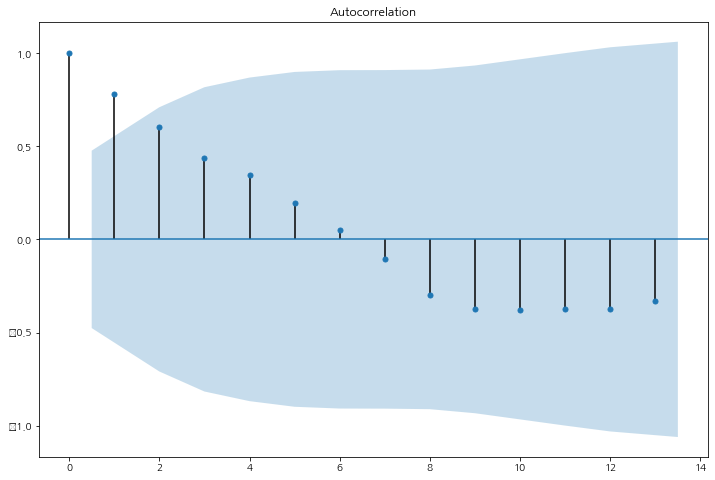

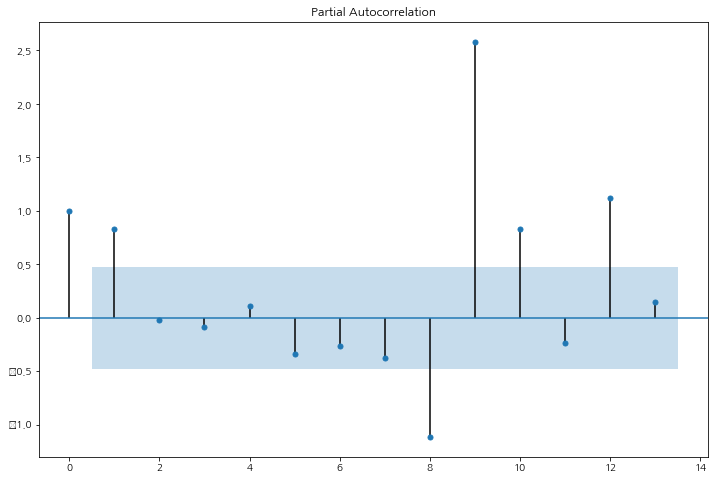

In [9]:
plot_acf(df_day_train)
plot_pacf(df_day_train)
plt.show()

In [10]:
#Train 데이터 이용, AR(1),I(2,차분),MA(0)인 ARIMA 모델
model=ARIMA(df_day_train,order=(1,2,0))
#데이터 적합
#trend:상수 포함 여부"nc"이면 상수 미포함,full_output:모든 출력결과 표시
result=model.fit(trend="nc",full_output=True)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D2.수량   No. Observations:                   15
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -84.504
Method:                       css-mle   S.D. of innovations             66.822
Date:                Wed, 22 Jul 2020   AIC                            173.008
Time:                        09:33:06   BIC                            174.424
Sample:                             2   HQIC                           172.992
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D2.수량    -0.5613      0.196     -2.859      0.004      -0.946      -0.177
                                    Roots                                    
                  Real          Imaginary         

/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


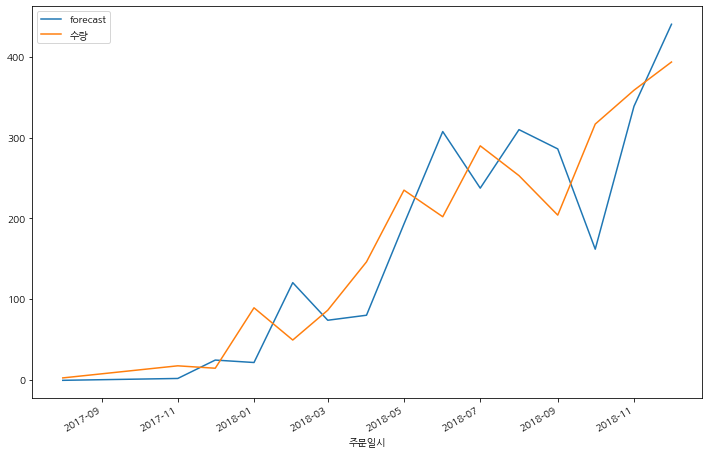

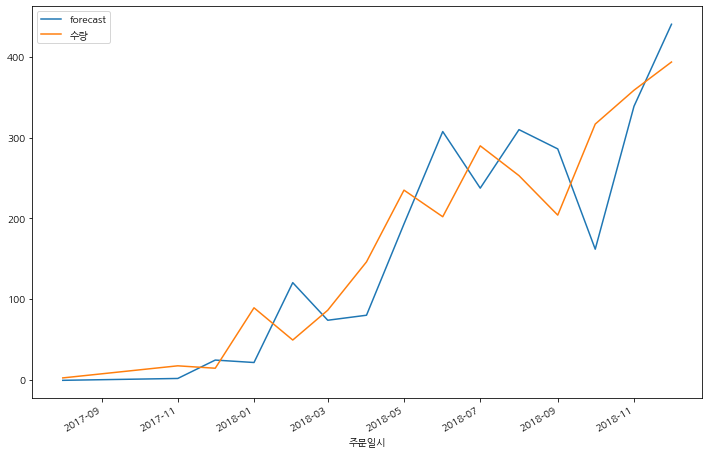

In [11]:
result.plot_predict()

In [25]:
start_time=df_day_test.index.min()
end_time=df_day_test.index.max()
print(start_time,end_time)

fig=result.predict(2,50,typ='levels')
fig


2019-01-01 00:00:00 2019-05-01 00:00:00


/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0    -1.000000   
1     1.315968   
2     24.141182  
3     21.104195  
4     120.215156 
5     73.554577  
6     79.776500  
7     193.089085 
8     307.721020 
9     237.483986 
10    310.077358 
11    286.168019 
12    161.736130 
13    339.062247 
14    440.855435 
15    432.929409 
16    469.653067 
17    507.614911 
18    544.881706 
19    582.538663 
20    619.976605 
21    657.537490 
22    695.029361 
23    732.559973 
24    770.068838 
25    807.589910 
26    845.104130 
27    882.622196 
28    920.138104 
29    957.655223 
30    995.171662 
31    1032.688483
32    1070.205089
33    1107.721816
34    1145.238475
35    1182.755172
36    1220.271848
37    1257.788536
38    1295.305217
39    1332.821902
40    1370.338584
41    1407.855268
42    1445.371952
43    1482.888635
44    1520.405319
45    1557.922002
46    1595.438686
47    1632.955369
48    1670.472053
dtype: float64

In [19]:
fore=result.forecast(steps=2)
print(fore)

(array([432.92940906, 469.65306733]), array([ 66.82189737, 117.07628637]), array([[301.96089684, 563.89792128],
       [240.18776259, 699.11837206]]))


In [15]:
#전체 기간의 실제값, 예측값 확인
start_time=pd.to_datetime("2018-01") #차분=2->시작일자+2이후부터 예측값 생성됨
y_pred=result.predict(start="2018-01",end="2018-12",typ='levels')
df_merge=df_day_test # 실제값 저장
df_merge["예측값"]=y_pred.astype(int)#예측값 저장 및 변수명 지정
df_merge["차이(절댓값)"]=(df_merge["수량"]-df_merge["예측값"])/df_merge["수량"]*100

df_merge=df_merge[5:]
#추세그래프 생성 및 확인
df_merge

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,수량,예측값,차이(절댓값)
주문일시,,,


In [ ]:
print(df_merge['수량'].sum(),df_merge['예측값'].sum())